In [1]:
import sys
sys.path.insert(1, '../')
from heterogenous_game_theory import *
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
plt.style.use('fivethirtyeight')
seed = 256
np.random.seed(seed)

AGENT PARAMETERS IN POPULATION
-------------------------------------
   M 		  E 		  I
-------------------------------------
| 1098 		 0.1 		 0.1 |
| 1028 		 0.1 		 0.1 |
| 1022 		 0.1 		 0.1 |
| 1017 		 0.1 		 0.1 |
| 1152 		 0.1 		 0.1 |
| 1104 		 0.1 		 0.1 |
| 1064 		 0.1 		 0.1 |
| 1020 		 0.1 		 0.1 |
| 1001 		 0.1 		 0.1 |
| 1015 		 0.1 		 0.1 |
| 1131 		 0.1 		 0.1 |
| 1246 		 0.1 		 0.1 |
| 1087 		 0.1 		 0.1 |
| 1019 		 0.1 		 0.1 |
| 1071 		 0.1 		 0.1 |
| 1171 		 0.1 		 0.1 |
| 1227 		 0.1 		 0.1 |
| 1000 		 0.1 		 0.1 |
| 1361 		 0.1 		 0.1 |
-------------------------------------
The s.d. of M is: 225.0
The s.d. of E is: 0.0
The s.d. of I is: 0.0
-------------------------------------
The mean of M is: 1130
The mean of E is: 0.1
The mean of I is: 0.1
-------------------------------------


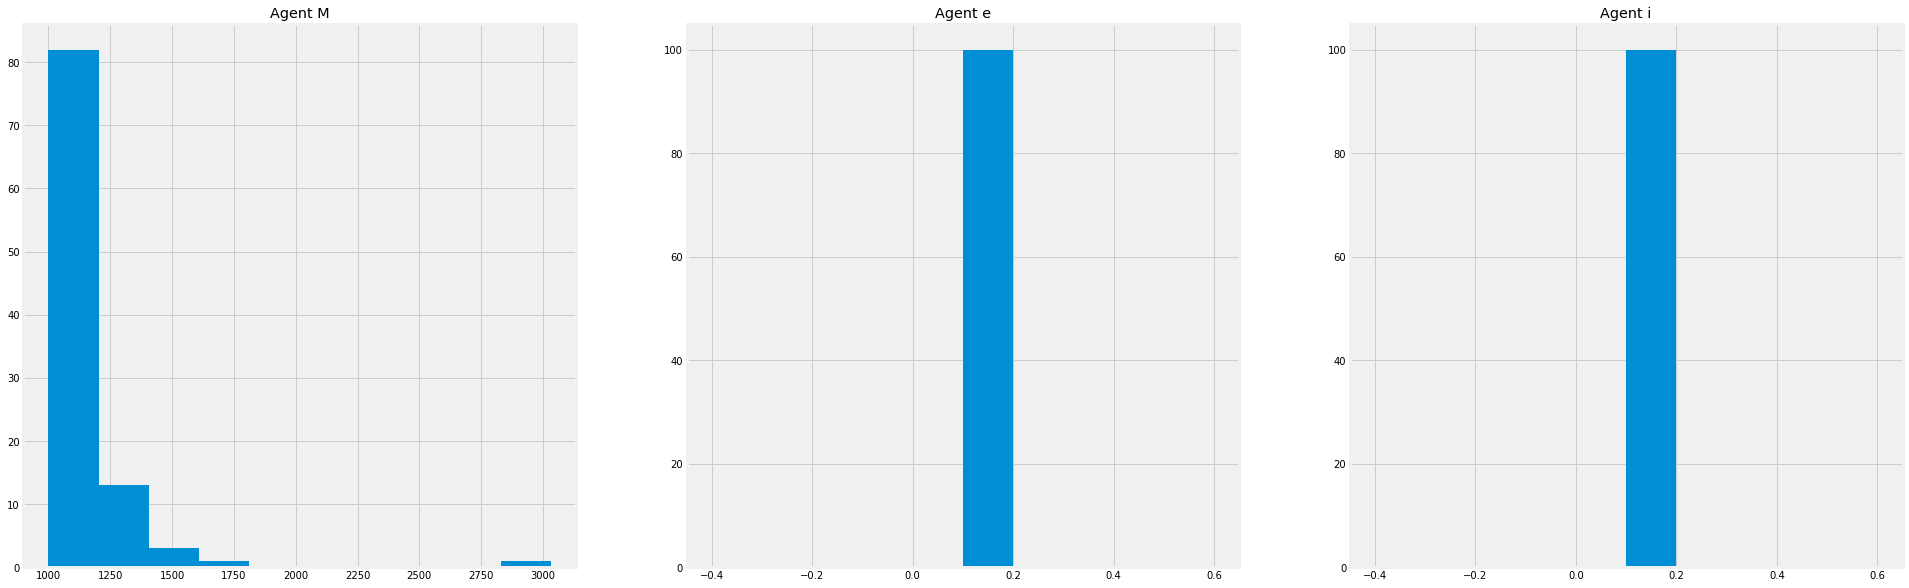

____________________________________________________________________________________________________
Agent 0 playing Agent 1: Reward: 93.0, Temptation: 103.0, Sucker: -10.0, Punishment: 0
Agent 1 playing Agent 0: Reward: 99.0, Temptation: 110.0, Sucker: -11.0, Punishment: 0
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Agent 0 playing Agent 2: Reward: 92.0, Temptation: 102.0, Sucker: -10.0, Punishment: 0
Agent 2 playing Agent 0: Reward: 99.0, Temptation: 110.0, Sucker: -11.0, Punishment: 0
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Agent 0 playing Agent 3: Reward: 92.0, Temptation: 102.0, Sucker: -10.0, Punishment: 0
Agent 3 playing Agent 0: Reward: 99.0, Temptation: 110.0, Su

In [2]:
# POWER DISTANCE TEST, FIRST IS LOWEST VALUE, SECOND IS DEGREE OF INEQUALITY
M = ["power",1000, 10]
E = [0.1, 1/10000]
I = [0.1, 1/10000]
power_distance = [M,E,I]

agents = get_agents(homogenous = False, number_of_agents = 100, M = M, E = E, I = I)
check_parameters(agents)
compare_payoff_function(agents, default_payoff_functions)

Tournament has started...
Tournament has ended. The simulation took 42 minutes.
    S.D.  Counts Seed
0    0.5     295  256
1    0.6     267  256
2    0.7     242  256
3    0.8     218  256
4    0.9     200  256
5    1.0     204  256
6    1.1     175  256
7    1.2     152  256
8    1.3     141  256
9    1.4     127  256
10   1.5     114  256
11   1.6      83  256
12   1.7      70  256
13   1.8      46  256
14   1.9      43  256
15   2.0      41  256
16   2.1      38  256
17   2.2      23  256
18   2.3      20  256
19   2.4      16  256
20   2.5      15  256
21   2.6      10  256
22   2.7       4  256
23   2.8       6  256
24   2.9       3  256
25   3.0       0  256


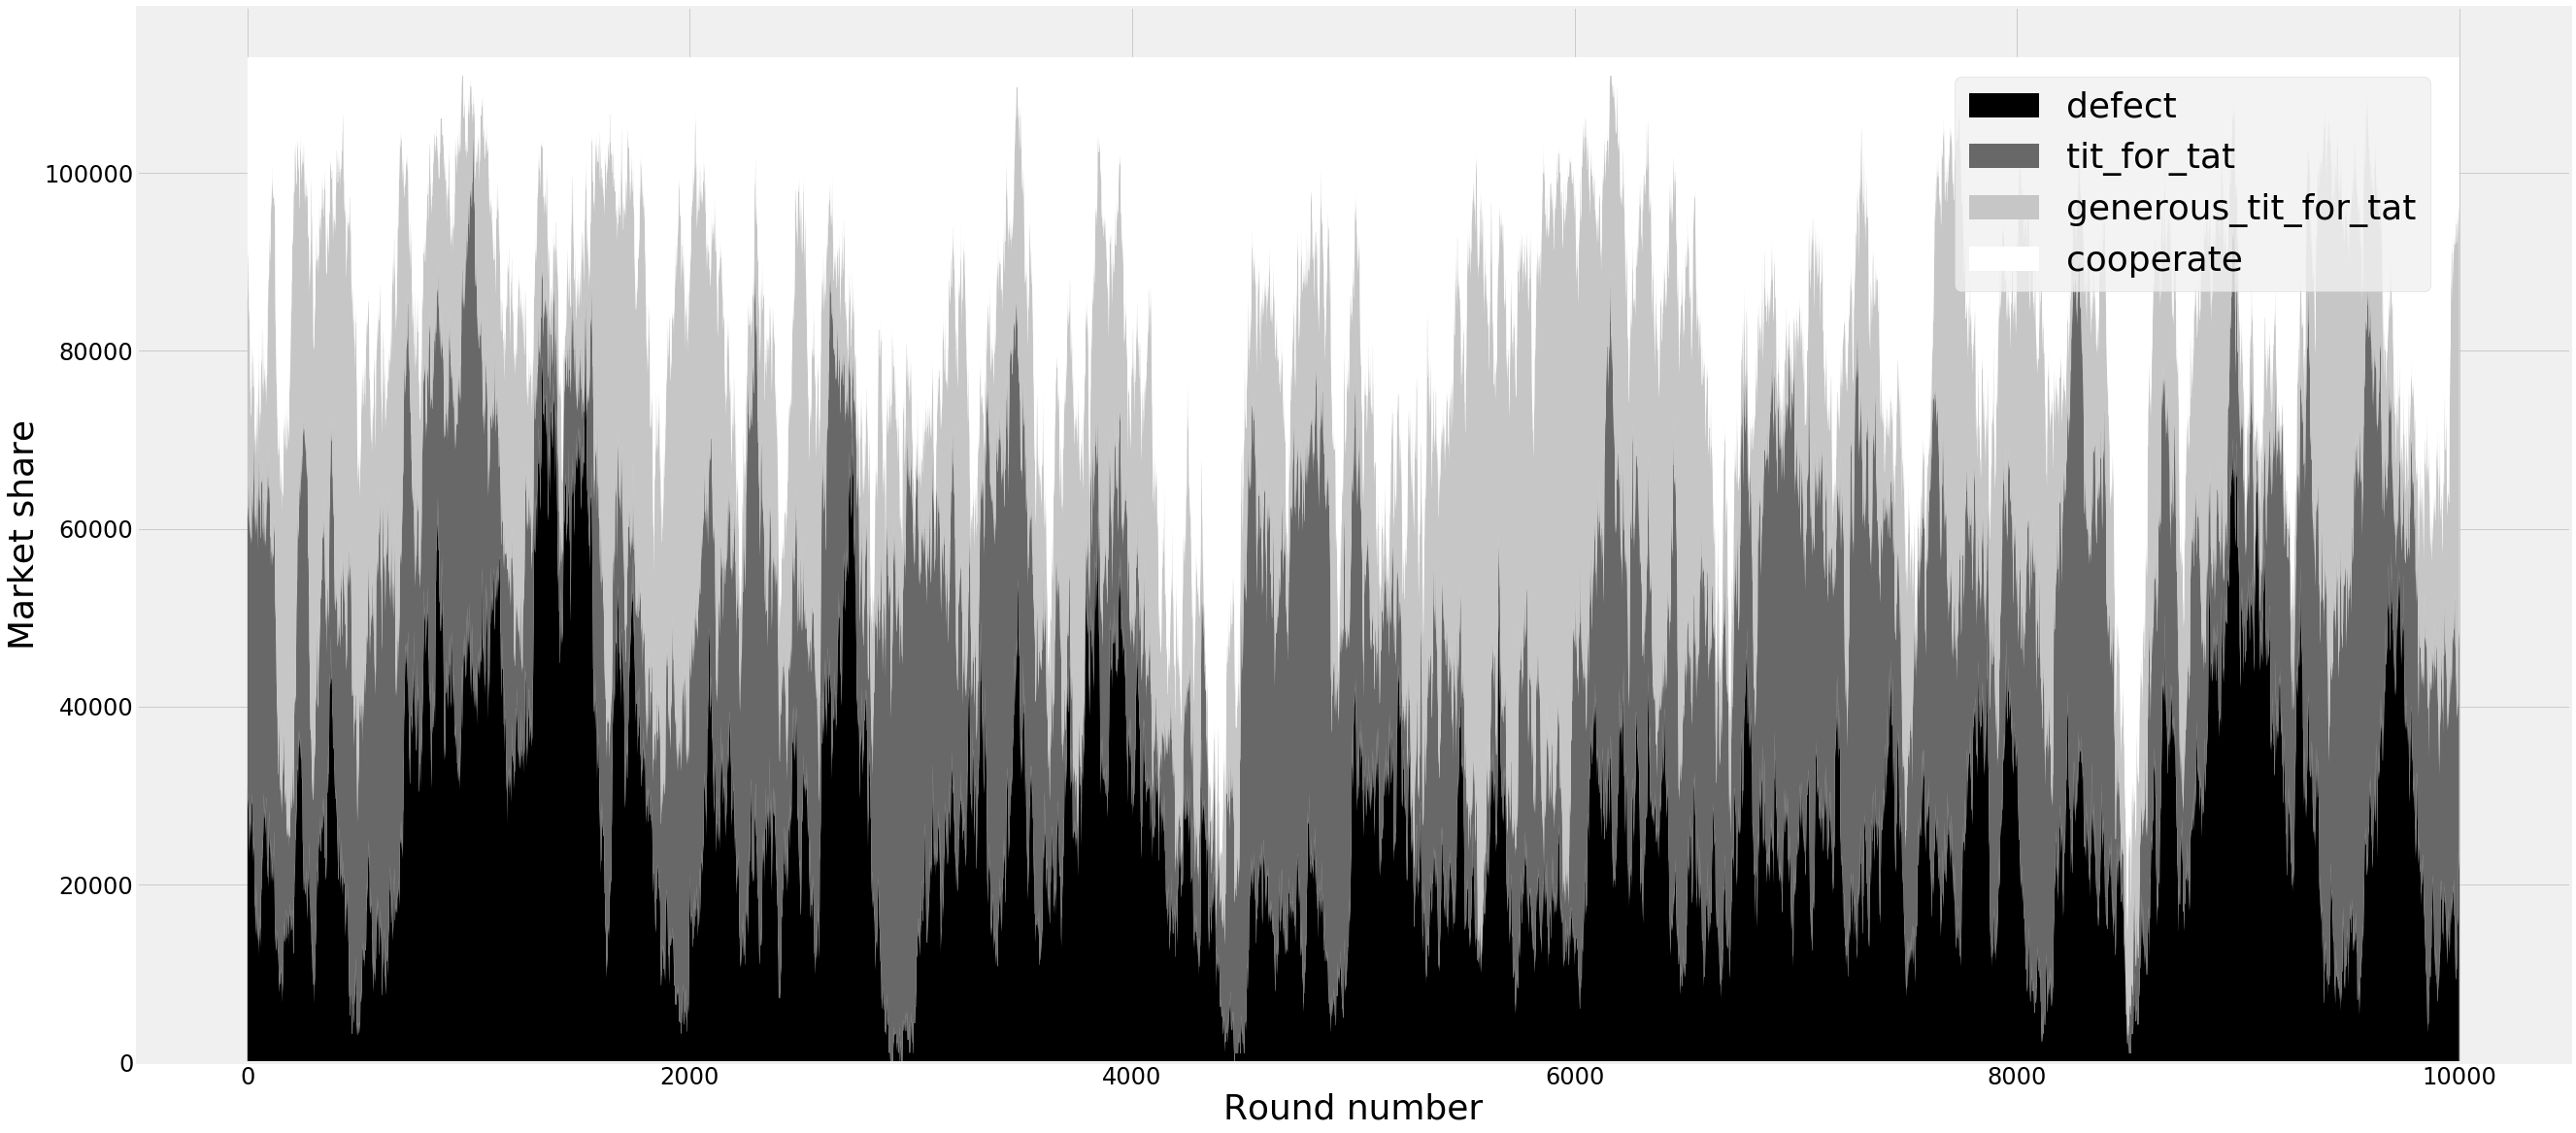

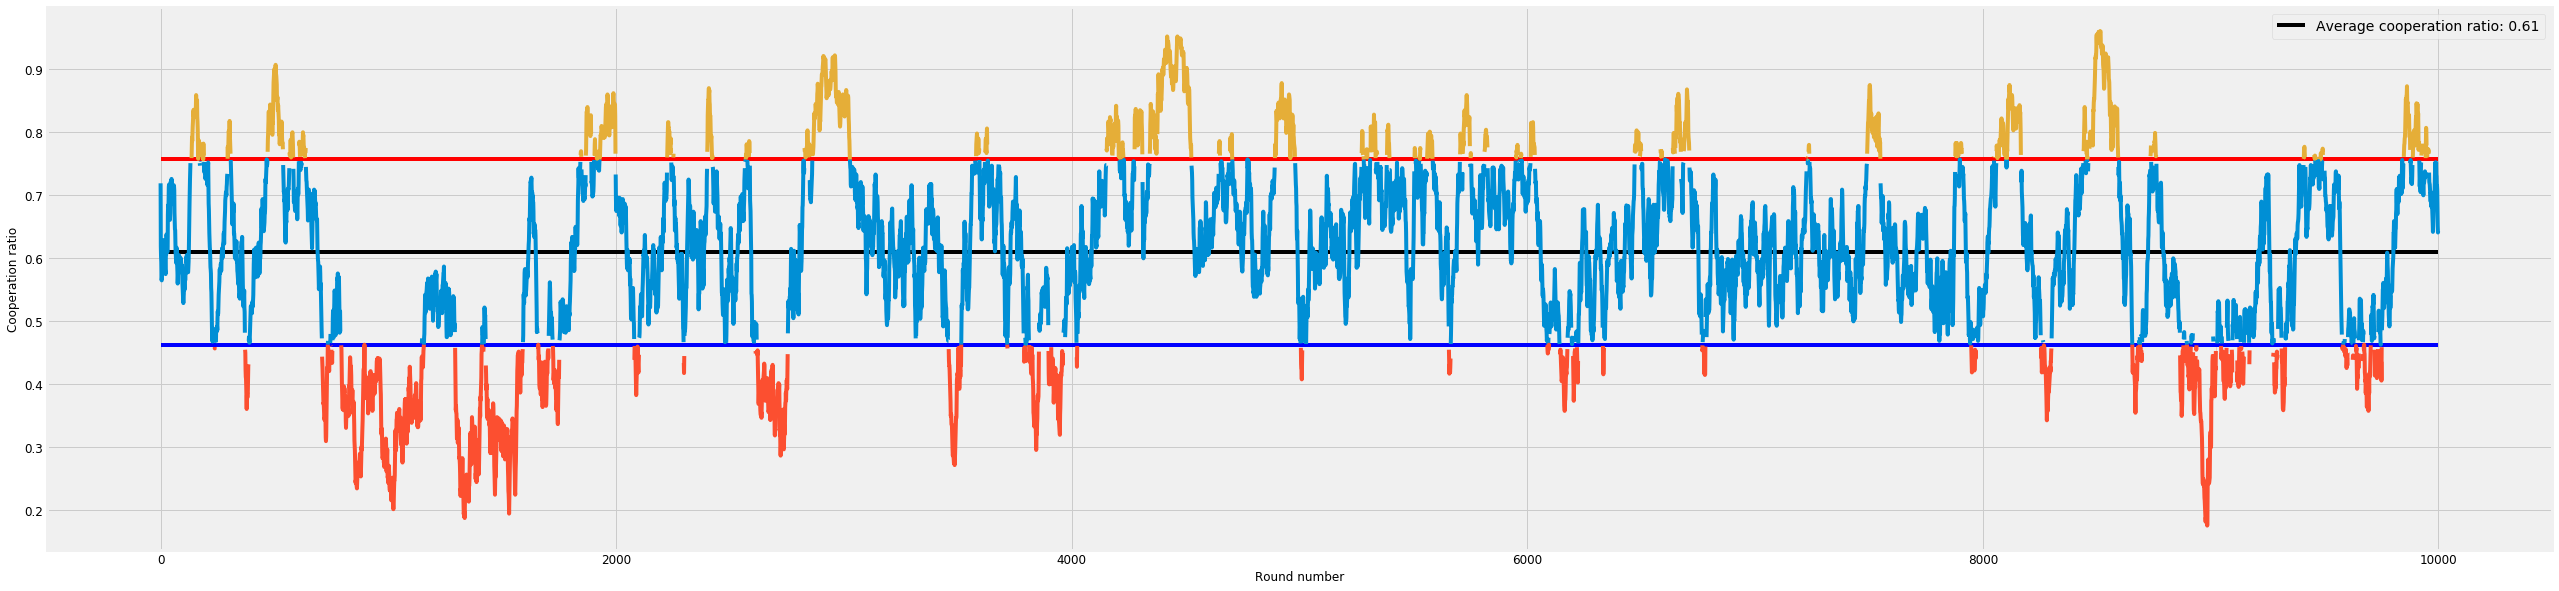

In [3]:
tour = Tournament.create_play_tournament(
                 agents = agents, 
                 max_rounds = 10000, 
                 strategy_list = [defect, tit_for_tat, generous_tit_for_tat, cooperate], 
                 payoff_functions = default_payoff_functions, 
                 surveillance_penalty = True,
                 self_reward = selfreward, #default function
                 playing_each_other = True,
                 nr_strategy_changes = 10,
                 mutation_rate = 0.1,
                 init_fitnes_as_m = False,
                 noise = 0.05,
                 )
draw_stack(tour)
C_D_ratios_per_round_var(tour, constant = 1)
outliers = count_outliers(tour, constants = np.arange(0.5, 3.1, 0.1))
data = {'S.D.': list(outliers.keys()), 'Counts': list(outliers.values()), 'Seed': str(seed)}
df = pd.DataFrame.from_dict(data)
print(df)
df.to_csv("Data/data_" + str(seed) + "_outliercounts.csv", encoding='utf-8', index = False, float_format='%.1f')
save_tournament_csv(tour, type_of_tournament= "_power_law_M", seed = str(seed))